# Study Space Research

## Analyzing data collected from college students aged 18 to 24

### Importing Tools

In [121]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv, solve
import plotly.graph_objects as go

### Importing data

In [122]:
data = pd.read_csv('StudySpaces.csv')

### Data Cleaning

In [123]:
rank = data[['What would you say is the most important parts of a good study space? [Most important]', 
             'What would you say is the most important parts of a good study space? [2nd most]',
             'What would you say is the most important parts of a good study space? [3rd most]',
             'What would you say is the most important parts of a good study space? [4th most]',
             'What would you say is the most important parts of a good study space? [Least important]',
            ]]

In [124]:
data = data.rename(columns={'How many hours do you spend in your study space?':'Hours spent'})
data = data.rename(columns={'How do you feel when you leave your study space?':'Leave','How do you feel when you walk into your study space?':'Enter'})
data = data.replace({'1-2 hours':2, '3-4 hours':4, '4-6 hours':6, '5-6 hours':6})

In [125]:
feelings = pd.DataFrame()
feelings['Enter'] = data['Enter']
feelings['Leave'] = data['Leave']
feelings['Difference'] = feelings['Enter']-feelings['Leave']

In [126]:
data = data.rename(columns={'Would you (most often) reserve entire rooms, or just seats within your study space?':'Space type'})
preferred = data['Space type']

In [127]:
data = data.rename(columns={'What would you say is the most important parts of a good study space? [Most important]':'First', 
                    'What would you say is the most important parts of a good study space? [2nd most]':'Second',
                    'What would you say is the most important parts of a good study space? [3rd most]':'Third',
                    'What would you say is the most important parts of a good study space? [4th most]':'Fourth',
                    'What would you say is the most important parts of a good study space? [Least important]':'Fifth'})

In [128]:
assign = data['Would you be ok with a randomly assigned space, or would you want to pick exactly what you reserve?']
assign = assign.replace({'Pick a certain part of the space':'Choose seating', "I don't care where I sit":'Random seating', "Randomly assigned spot":'Random seating'})

In [129]:
traditional = data['Which traditional study space do you prefer?']

In [130]:
timing = data['What time of day do you usually walk into your study space?']

In [131]:
hours = data['Hours spent']

In [132]:
people = data['How do you feel about other people in the same study space as you?']

In [133]:
likely = data[
    'If you were able to reserve a spot for yourself in your study space for a day, how often would you reserve it?']

In [134]:
frequency = data['How often do you go to a specific study space for work?']
data = data.rename(columns={'How often do you go to a specific study space for work?':'Study frequency',
                           'If you were able to reserve a spot for yourself in your study space for a day, how often would you reserve it?':'Often'})

In [180]:
ranked = data[['First','Second','Third','Fourth','Fifth']]
ranked.groupby('First').count()
ranked['First'].value_counts()
ranked = ranked.replace('How many other people are there', 'How busy / empty it is')
spaceRanked = ranked.apply(pd.value_counts).fillna(0)

In [104]:
TOD = pd.DataFrame()
TOD['timing'] = timing.replace({'Very early morning (4am - 7am)':0,
                       'Morning (8am - 11am)':1,
                       'Afternoon (12pm - 2pm)':2,
                       'Early Evening (3pm - 5pm)':3,
                       'Evening (6pm - 10pm)':4,
                       'Very late evening (11pm - 3am)':5
                      })
TOD['Studying frequency'] = data['Study frequency']
TOD['Hours spent'] = data["Hours spent"]
TOD['Reservation frequency'] = data["Often"]
TOD['Stress entering'] = data['Enter']
TOD['Stress leaving'] = data['Leave']

In [136]:
seats = spaceRanked.loc['Availability of seats']
wifi = spaceRanked.loc['Strong WiFi']
busy = spaceRanked.loc['How busy / empty it is']
people = spaceRanked.loc['How many other people are there']
location = spaceRanked.loc['Location (to campus)']
design = spaceRanked.loc['Lighting / Interior Design']

new = pd.DataFrame()
new['Seats'] = seats
new['Location'] = location
new['Design'] = design
new['People'] = people
new['Busy'] = busy
new['Wifi'] = wifi
new['Rank'] = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
new['Ranking'] = [1,2,3,4,5]

### Exploratory Data Analysis

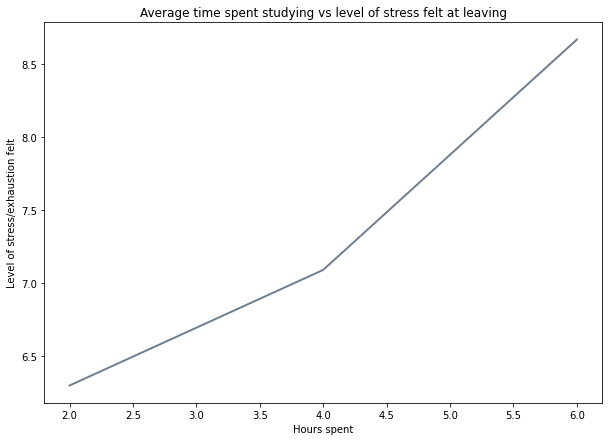

In [137]:
mean_hours = data.groupby('Hours spent')['Leave'].mean()
plt.figure(figsize = (10,7))
plt.plot(mean_hours, c='slategrey', linewidth = 2)
plt.title('Average time spent studying vs level of stress felt at leaving')
plt.xlabel('Hours spent')
plt.ylabel('Level of stress/exhaustion felt')
plt.show()

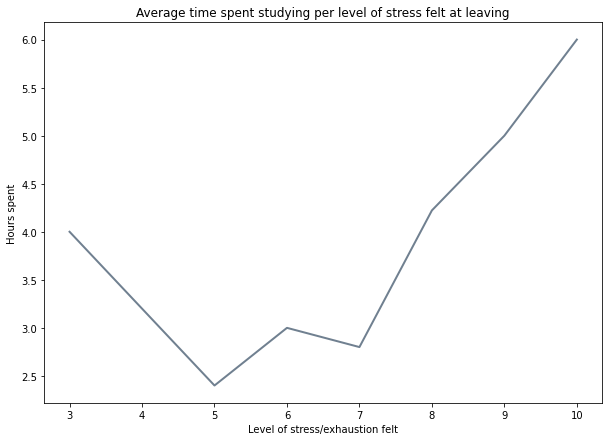

In [138]:
mean_leave = data.groupby('Leave')['Hours spent'].mean()
plt.figure(figsize = (10,7))
plt.plot(mean_leave, c='slategrey', linewidth = 2)
plt.title('Average time spent studying per level of stress felt at leaving')
plt.xlabel('Level of stress/exhaustion felt')
plt.ylabel('Hours spent')
plt.show()

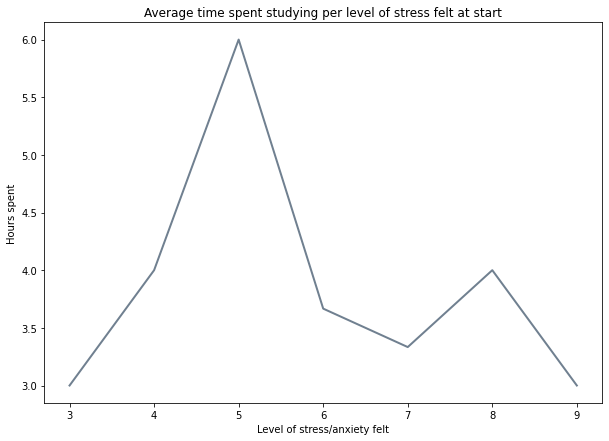

In [139]:
mean_enter = data.groupby('Enter')['Hours spent'].mean()
plt.figure(figsize = (10,7))
plt.plot(mean_enter, c='slategrey', linewidth = 2)
plt.title('Average time spent studying per level of stress felt at start')
plt.xlabel('Level of stress/anxiety felt')
plt.ylabel('Hours spent')
plt.show()

### Analyzing stress levels

Text(0.5, 1.0, 'Difference in levels of stress entering vs exiting a study space')

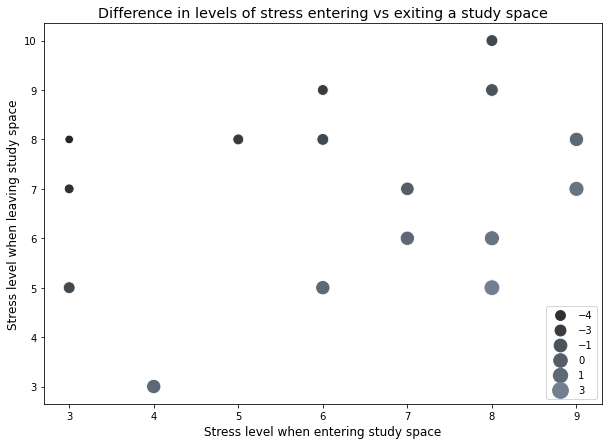

In [140]:
cmap = sns.dark_palette("slategrey", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data=feelings, x="Enter", y="Leave", size = "Difference", hue = "Difference", 
                sizes = (75,250), palette = cmap)
plt.legend(fontsize = 'medium', loc='lower right')
plt.xlabel('Stress level when entering study space', fontsize = 'larger')
plt.ylabel('Stress level when leaving study space', fontsize = 'larger')
plt.title('Difference in levels of stress entering vs exiting a study space', fontsize = 'x-large')

Text(0.5, 0, 'Hours spent in study space')

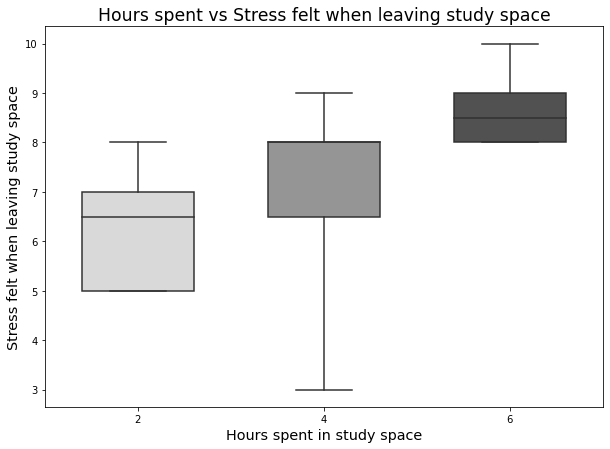

In [152]:
plt.figure(figsize=(10,7))
stress = data[['Enter','Leave','Hours spent']]
sns.boxplot(x="Hours spent", y="Leave", data=stress,
            whis=[0, 100], width=.6, palette='Greys')
plt.title("Hours spent vs Stress felt when leaving study space", fontsize = 'xx-large')
plt.ylabel('Stress felt when leaving study space',fontsize = 'x-large')
plt.xlabel('Hours spent in study space', fontsize = 'x-large')

Text(0.5, 0, 'Hours spent in study space')

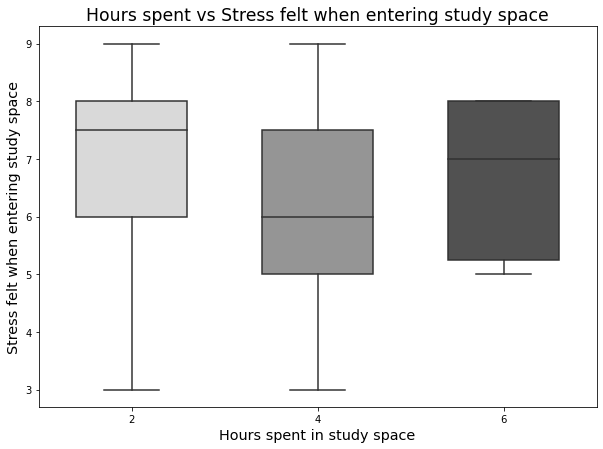

In [148]:
plt.figure(figsize = (10,7))
sns.boxplot(x="Hours spent", y="Enter", data=stress,
            whis=[0, 100], width=.6, palette='Greys')
plt.title("Hours spent vs Stress felt when entering study space", fontsize = 'xx-large')
plt.ylabel('Stress felt when entering study space',fontsize = 'x-large')
plt.xlabel('Hours spent in study space', fontsize = 'x-large')

Text(0.5, 0, 'Hours spent in study space')

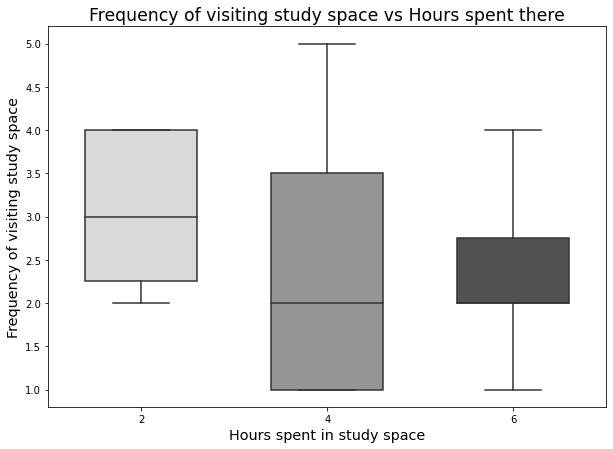

In [145]:
plt.figure(figsize = (10,7))
freq = data[['Study frequency','Leave','Hours spent']]
ax[0] = sns.boxplot(x="Hours spent", y="Study frequency", data=freq,
            whis=[0, 100], width=.6, palette='Greys')
plt.title("Frequency of visiting study space vs Hours spent there", fontsize = 'xx-large')
plt.ylabel('Frequency of visiting study space',fontsize = 'x-large')
plt.xlabel('Hours spent in study space', fontsize = 'x-large')

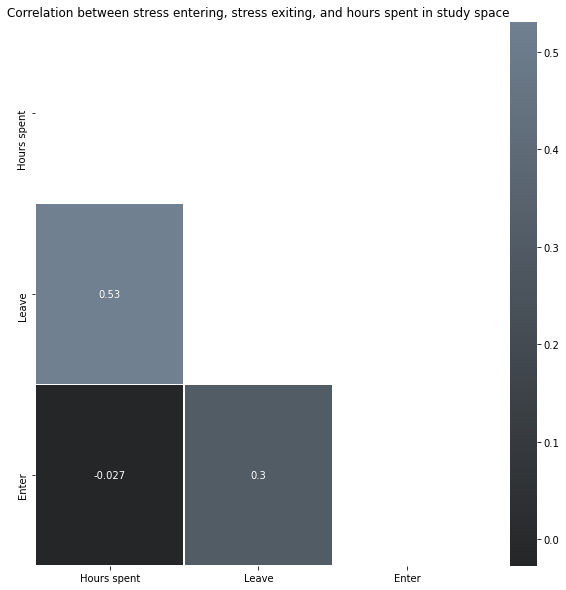

In [112]:
basic_data = data[['Hours spent','Leave','Enter']]
corr = basic_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(basic_data.corr(),mask=mask, cmap = cmap, annot=True, linewidths=.5, ax=ax)
plt.title('Correlation between stress entering, stress exiting, and hours spent in study space', fontsize = 'larger')
plt.show()

##### There is a moderate correlation between hours spent studying and the level of stress felt when leaving

Text(0.5, 1.0, 'Correlation of Studying Frequency, Reservation Frequency, and Hours Studying')

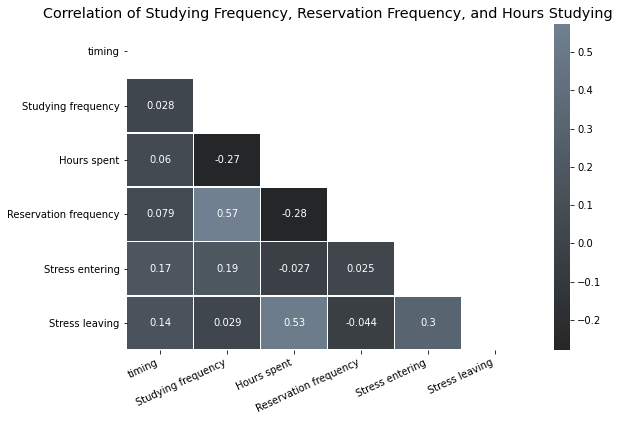

In [107]:
f, ax = plt.subplots(figsize=(9, 6))
mask = np.triu(np.ones_like(TOD.corr(), dtype=bool))
sns.heatmap(TOD.corr(), annot=True, linewidths=.5, ax=ax, mask = mask, cmap = cmap).set_xticklabels(
    TOD.corr(), rotation=25, ha="right")
plt.title('Correlation of Studying Frequency, Reservation Frequency, and Hours Studying', fontsize = 'x-large')

##### There is a moderate correlation between the frequency a student vists a study space and how often they'd likely use the study reservation system

###### Additional visualization

In [97]:
fig = go.Figure()
data_scatter = go.Scatter3d(x=data["Leave"], y=data["Enter"], z=data["Hours spent"], 
                            mode="markers",
                            marker=dict(size=12,color=data['Hours spent'],colorscale='curl_r'))
fig.add_trace(data_scatter)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600)
fig

### Study preferences

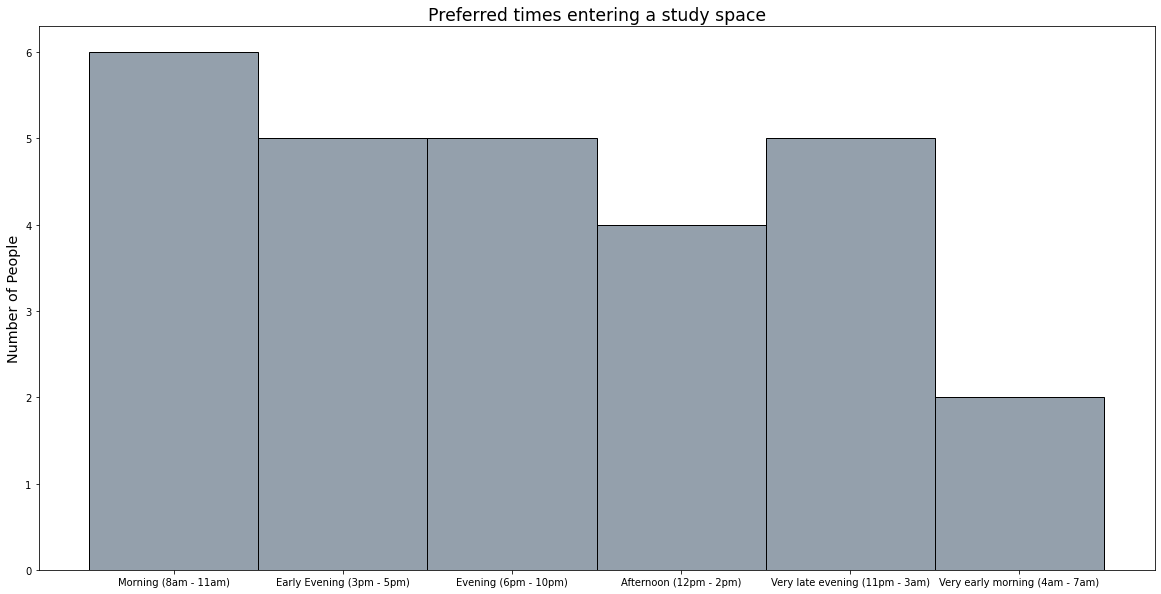

In [90]:
plt.figure(figsize = (20,10))
sns.histplot(timing, bins=6, ec='black', color='slategrey')
plt.title('Preferred times entering a study space', fontsize = 'xx-large')
plt.ylabel('Number of People',fontsize = 'x-large')
plt.xlabel('')
plt.show()

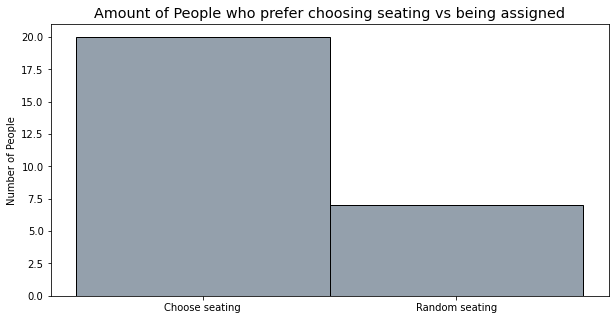

In [91]:
plt.figure(figsize = (10,5))
sns.histplot(assign, bins=2, color = 'slategrey')
plt.ylabel('Number of People')
plt.xlabel('')
plt.title('Amount of People who prefer choosing seating vs being assigned', fontsize = 'x-large')
plt.show()

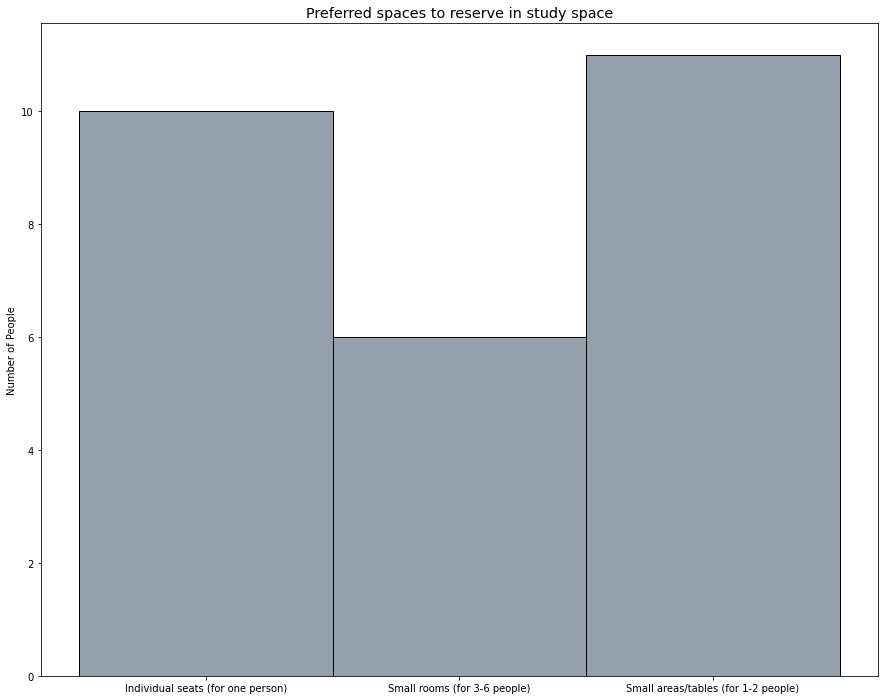

In [92]:
plt.figure(figsize = (15,12))

sns.histplot(preferred, bins=6, ec='black', color='slategrey')
plt.title('Preferred spaces to reserve in study space', fontsize = 'x-large')
plt.ylabel('Number of People')
plt.xlabel('')
plt.show()

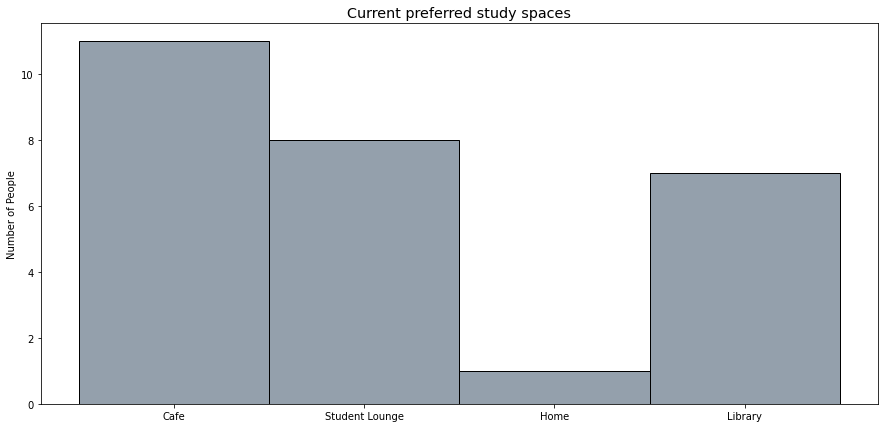

In [93]:
plt.figure(figsize = (15,7))

sns.histplot(traditional, bins=6, ec='black', color='slategrey')
plt.title('Current preferred study spaces', fontsize = 'x-large')
plt.ylabel('Number of People')
plt.xlabel('')
plt.show()

### Ranking study space features

In [181]:
spaceRanked

,First,Second,Third,Fourth,Fifth
Availability of seats,9,10,4,3.0,1
How busy / empty it is,1,7,6,5.0,8
Lighting / Interior Design,1,3,3,12.0,8
Location (to campus),2,3,6,7.0,9
Strong WiFi,14,4,8,0.0,1


Text(0.5, 1.0, 'Ranking of study space features')

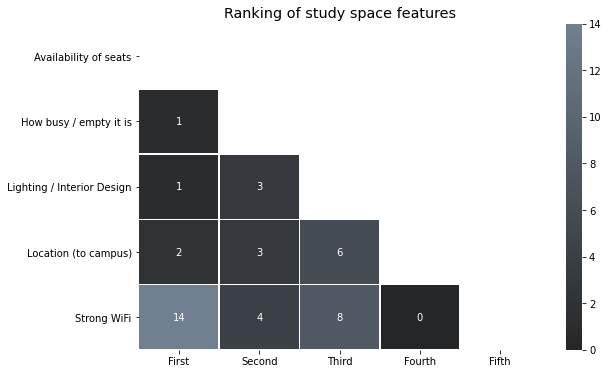

In [182]:
f, ax = plt.subplots(figsize=(9, 6))
mask = np.triu(np.ones_like(spaceRanked, dtype=bool))
sns.heatmap(spaceRanked, annot=True, linewidths=.5, ax=ax, mask = mask, cmap = cmap)
plt.title('Ranking of study space features', fontsize = 'x-large')

Text(0.5, 0.98, 'Study space feature vs Ranking')

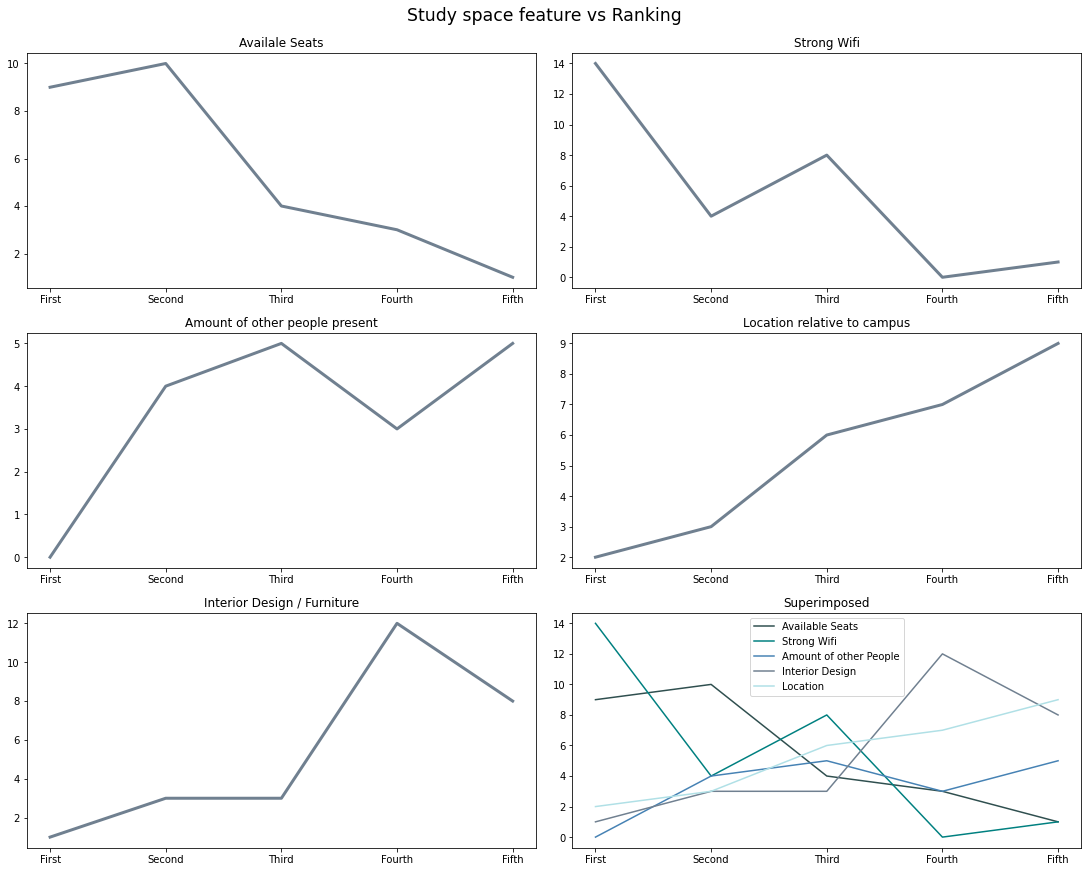

In [183]:
fig, ax = plt.subplots(3,2,constrained_layout=True,figsize=(15,12))

ax[0,0].plot(new['Seats'], c = 'slategrey', linewidth=3.0)
ax[0,0].set_title('Availale Seats')

ax[0,1].plot(new['Wifi'], c = 'slategrey', linewidth=3.0)
ax[0,1].set_title('Strong Wifi')

ax[1,0].plot(new['People'], c = 'slategrey', linewidth=3.0)
ax[1,0].set_title('Amount of other people present')

ax[2,1].plot(new['Seats'], c = 'darkslategrey', label='Available Seats')
ax[2,1].plot(new['Wifi'], c = 'teal',label='Strong Wifi')
ax[2,1].plot(new['People'], c = 'steelblue', label='Amount of other People')
ax[2,1].plot(new['Design'], c = 'slategrey', label='Interior Design')
ax[2,1].plot(new['Location'], c = 'powderblue', label='Location')

plt.legend(fontsize='medium', loc = 'upper center')
ax[2,1].set_title('Superimposed')

ax[2,0].plot(new['Design'], c = 'slategrey', linewidth=3.0)
ax[2,0].set_title('Interior Design / Furniture')

ax[1,1].plot(new['Location'], c = 'slategrey', linewidth=3.0)
ax[1,1].set_title('Location relative to campus')

plt.suptitle('Study space feature vs Ranking', fontsize = 'xx-large')


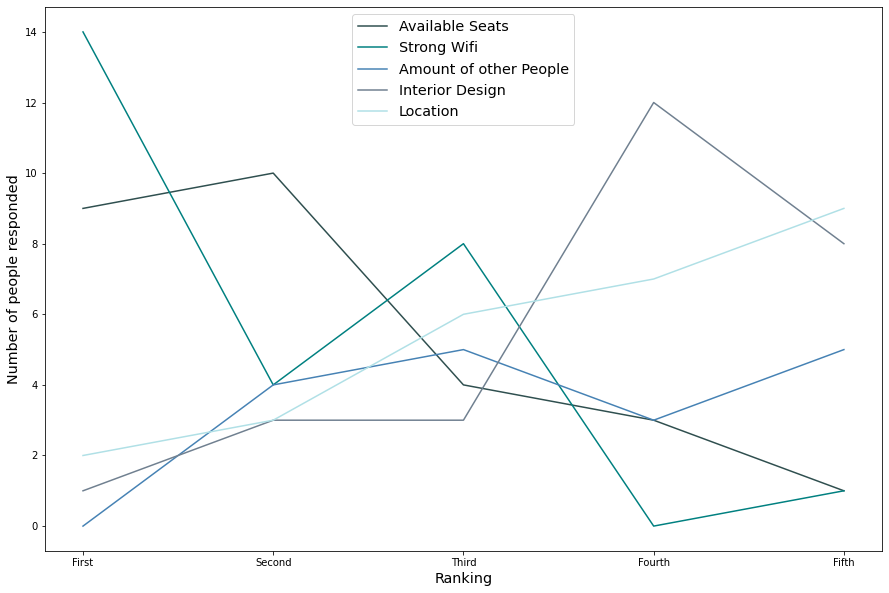

In [184]:
plt.figure(figsize = (15,10))

plt.plot(new['Seats'], c = 'darkslategrey', label='Available Seats')
plt.plot(new['Wifi'], c = 'teal',label='Strong Wifi')
plt.plot(new['People'], c = 'steelblue', label='Amount of other People')
plt.plot(new['Design'], c = 'slategrey', label='Interior Design')
plt.plot(new['Location'], c = 'powderblue', label='Location')
plt.ylabel("Number of people responded", fontdict={'fontsize':'x-large'})
plt.xlabel('Ranking', fontdict={'fontsize':'x-large'})

plt.legend(fontsize='x-large', loc = 'upper center')

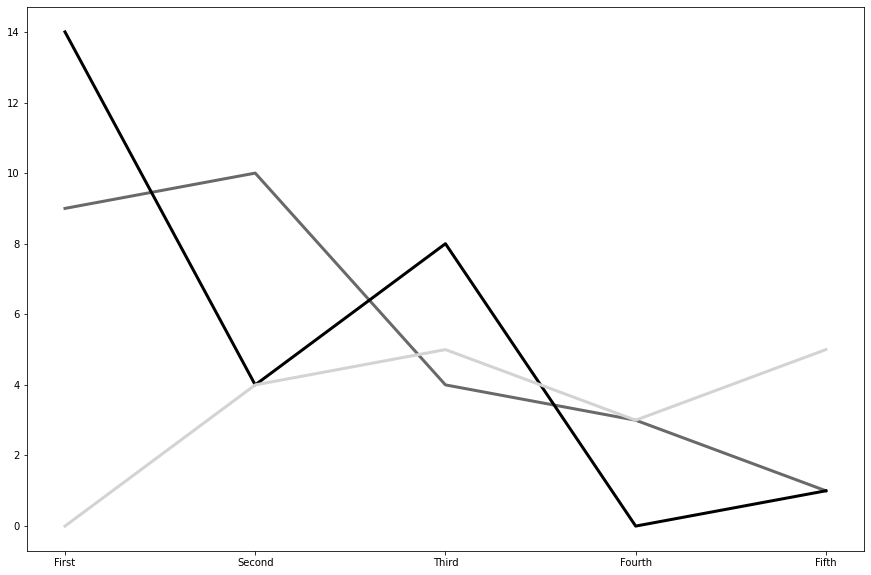

In [186]:
plt.figure(figsize = (15,10))

plt.plot(new['Seats'], c = 'dimgrey', linewidth=3.0)
plt.plot(new['Wifi'], c = 'black', linewidth=3.0)
plt.plot(new['People'], c = 'lightgrey', linewidth=3.0)

plt.show()

#### It seems the ranking is: 
##### 1. Strong WiFi   
##### 2. Availability of seats   
##### 3. Location (to campus)   
##### 4. Lighting / Interior Design   
##### 5. How busy / empty it is

### Takeaways

#### Students seem to prefer accessibility to the aesthetics of a study space. 

#### They also report feelings of stress when exiting and entering a study space. Stress is notably higher when leaving a study space, especially if the student spent a long time within the space.

### Further Exploration

#### Moving forward, I am interested in understanding the nature of a student's study experience throughout the course of their stay at a study space. It would be interesting to see how their stress levels change as they study.

#### I am also interested in further exploring the functions of a study space and how a student interacts with and uses a given space.